# Customer Conversion Prediction

### Problem Statement

You are working for a new-age insurance company and employ multiple outreach plans to sell term insurance to your
customers. Telephonic marketing campaigns still remain one of the most effective ways to reach out to people however they incur a lot of cost. Hence, it is important to identify thecustomers that are most likely to convert beforehand so that they can be specifically targeted via call. We are given the historical marketing data of the insurance company and are required to build a ML model that will predict if a client will subscribe to the insurance.

### Importing the important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns

In [2]:
# for model creation and evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Getting the data

We'll work with the Customer Conversion Prediction csv file. It has features such as Age,Job,Martial,Education ,Call type,day,month,duration,number of calls and previous outcome.Since the target variable is given to us as "Y" this is considered to be a supervised - classification problem statement.

In [3]:
df = pd.read_csv("Customer Conversion Prediction - Customer Conversion Prediction.csv")

In [4]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


#### Read the complete information of the dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


#### Find the number of null values in the dataset

In [6]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [7]:
# cross  checking  for  null  values
pd.DataFrame(df.isnull().sum()).T

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,0,0,0,0,0,0,0,0,0,0,0


#### Read the columns in the dataframe

In [8]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

#### Shape of the dataframe

In [9]:
print(f'The DataFrame contains {df.shape[0]} rows and {df.shape[1]} columns.')

The DataFrame contains 45211 rows and 11 columns.


#### Data Type of each column

In [10]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

##### Figuring out the unique values in "Age".

In [11]:
df['age'].value_counts()

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
88       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64

##### Figuring out the unique values in "Job".

In [12]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

****** Since the job has a feature named as "unkown" which has 288 values we do mode imputation method to replace the values.**

In [13]:
df['job'].replace('unknown',df['job'].mode()[0],inplace=True)

In [14]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'retired', 'admin.', 'services', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

In [15]:
# after mode imputation

In [16]:
df['job'].value_counts()

blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

##### Figuring out the unique values in "Marital".

In [17]:
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

##### Figuring out the unique values in "Education".

In [18]:
df['education_qual'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education_qual, dtype: int64

** Since the Education qualification has a feature named as "unknown" which has 1857 values we do mode imputation method to replace the values.**

In [19]:
df['education_qual'].replace("unknown",df['education_qual'].mode()[0],inplace=True)

In [20]:
df['education_qual'].unique()

array(['tertiary', 'secondary', 'primary'], dtype=object)

In [21]:
df['education_qual'].value_counts()

secondary    25059
tertiary     13301
primary       6851
Name: education_qual, dtype: int64

##### Figuring out the unique values in "CallType".

In [22]:
df['call_type'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: call_type, dtype: int64

** Since the job has a feature named as "unkown" which has 288 values we do mode imputation method to replace the values.**

In [24]:
df['call_type'].replace("unknown",df['call_type'].mode()[0],inplace=True)

In [25]:
df['call_type'].unique()

array(['cellular', 'telephone'], dtype=object)

In [26]:
df['call_type'].value_counts()

cellular     42305
telephone     2906
Name: call_type, dtype: int64

##### Figuring out the unique values in "Day".

In [27]:
df['day'].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

##### Figuring out the unique values in "Month".

In [28]:
df['mon'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

##### Figuring out the unique values in "Duration".

In [29]:
df['dur'].value_counts()

124     188
90      184
89      177
114     175
122     175
       ... 
972       1
1132      1
2456      1
1420      1
2015      1
Name: dur, Length: 1573, dtype: int64

In [30]:
df['num_calls'].value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
28       16
29       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
35        4
36        4
38        3
43        3
37        2
50        2
41        2
51        1
58        1
39        1
55        1
44        1
46        1
63        1
Name: num_calls, dtype: int64

##### Figuring out the unique values in "outcome of the previous marketing campaign".

In [31]:
df['prev_outcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

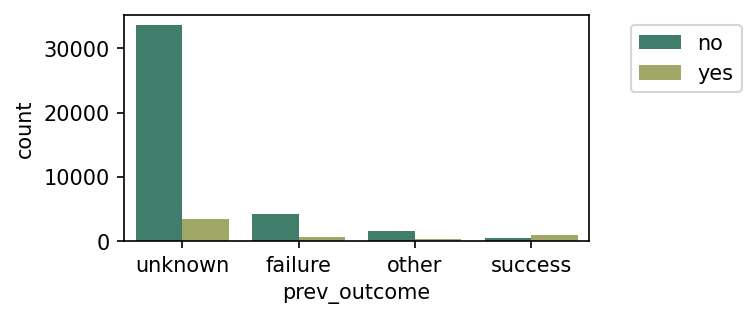

In [32]:
plt.figure(figsize=(4,2),dpi=150)
sns.countplot(x='prev_outcome',data=df,hue='y',palette='gist_earth')
plt.legend(bbox_to_anchor=[1.35,1])

In [33]:
pre_unko = df['prev_outcome'][df['prev_outcome']=='unknown'].count()
pre_unko

36959

In [34]:
pre_unko = pre_unko/df['prev_outcome'].count()*100
print(f'{pre_unko}% of prev_outcome column is unknown')

81.74780473778506% of prev_outcome column is unknown


** Nearly 80 percent of values are missing in the prev_outcome column. It does not add any value to the data to be imputed hence we can drop this.

In [35]:
df.drop('prev_outcome',axis=1, inplace=True)

In [36]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,y
0,58,management,married,tertiary,cellular,5,may,261,1,no
1,44,technician,single,secondary,cellular,5,may,151,1,no
2,33,entrepreneur,married,secondary,cellular,5,may,76,1,no
3,47,blue-collar,married,secondary,cellular,5,may,92,1,no
4,33,blue-collar,single,secondary,cellular,5,may,198,1,no


##### Figuring out the unique values in "Y- target variable".

In [37]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [ ]:
## Data after removing the duplicates

In [38]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,y
0,58,management,married,tertiary,cellular,5,may,261,1,no
1,44,technician,single,secondary,cellular,5,may,151,1,no
2,33,entrepreneur,married,secondary,cellular,5,may,76,1,no
3,47,blue-collar,married,secondary,cellular,5,may,92,1,no
4,33,blue-collar,single,secondary,cellular,5,may,198,1,no


In [39]:
df.shape

(45211, 10)

### Exploratory Data Analysis and Visualization

'call_type', 'mon', 'marital', 'y', 'job', 'education_qual'

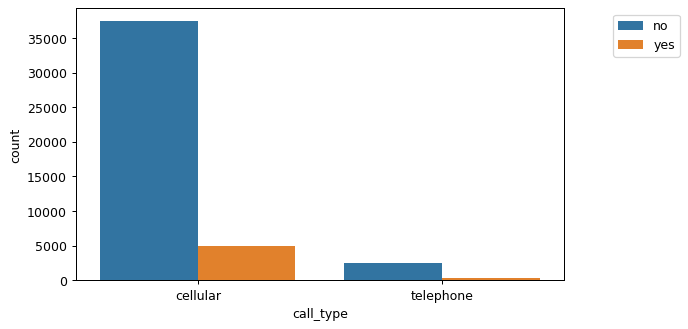

In [40]:
plt.figure(figsize=(7,4),dpi=90)
sns.countplot(x='call_type',data=df,hue='y')
plt.legend(bbox_to_anchor=(1.25,1))

<AxesSubplot:xlabel='mon', ylabel='count'>

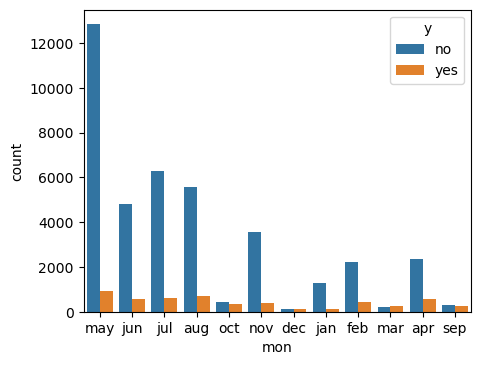

In [41]:
plt.figure(figsize=(5,4),dpi=100)
sns.countplot(x='mon',data=df,hue='y')

<AxesSubplot:xlabel='marital', ylabel='count'>

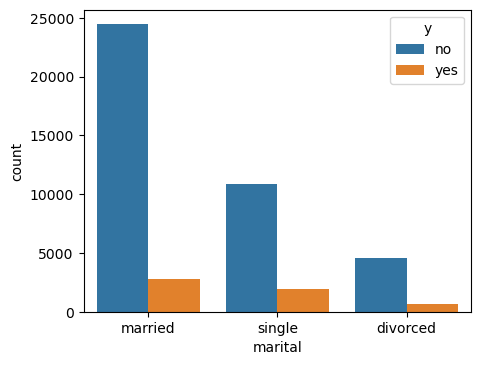

In [42]:
plt.figure(figsize=(5,4),dpi=100)
sns.countplot(x='marital',data=df,hue='y')

<AxesSubplot:xlabel='job', ylabel='count'>

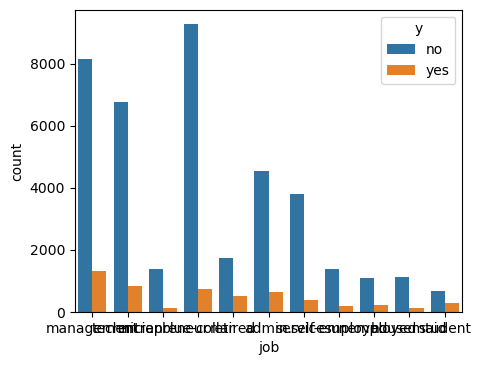

In [43]:
plt.figure(figsize=(5,4),dpi=100)
sns.countplot(x='job',data=df,hue='y')

<AxesSubplot:xlabel='education_qual', ylabel='count'>

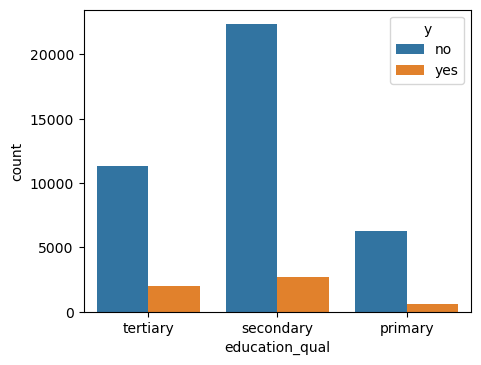

In [44]:
plt.figure(figsize=(5,4),dpi=100)
sns.countplot(x='education_qual',data=df,hue='y')

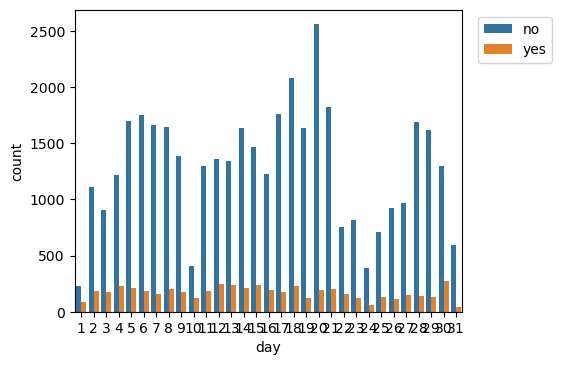

In [45]:
plt.figure(figsize=(5,4),dpi=100)
sns.countplot(x='day',data=df,hue='y')
plt.legend(bbox_to_anchor=(1.25,1))

In [46]:
plt.figure(figsize=(20,18),dpi=500)
sns.countplot(x='age',data=df,hue='y')
plt.legend(bbox_to_anchor=(1.25,1))

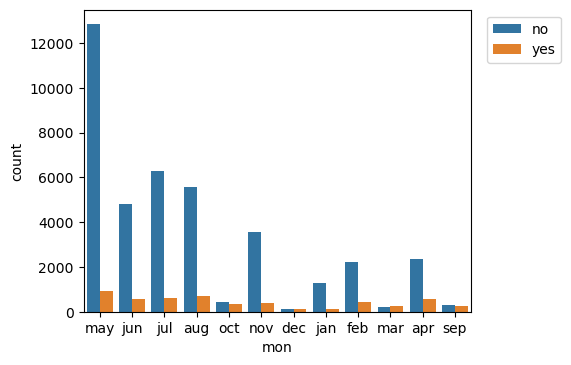

In [47]:
plt.figure(figsize=(5,4),dpi=100)
sns.countplot(x='mon',data=df,hue='y')
plt.legend(bbox_to_anchor=(1.25,1))

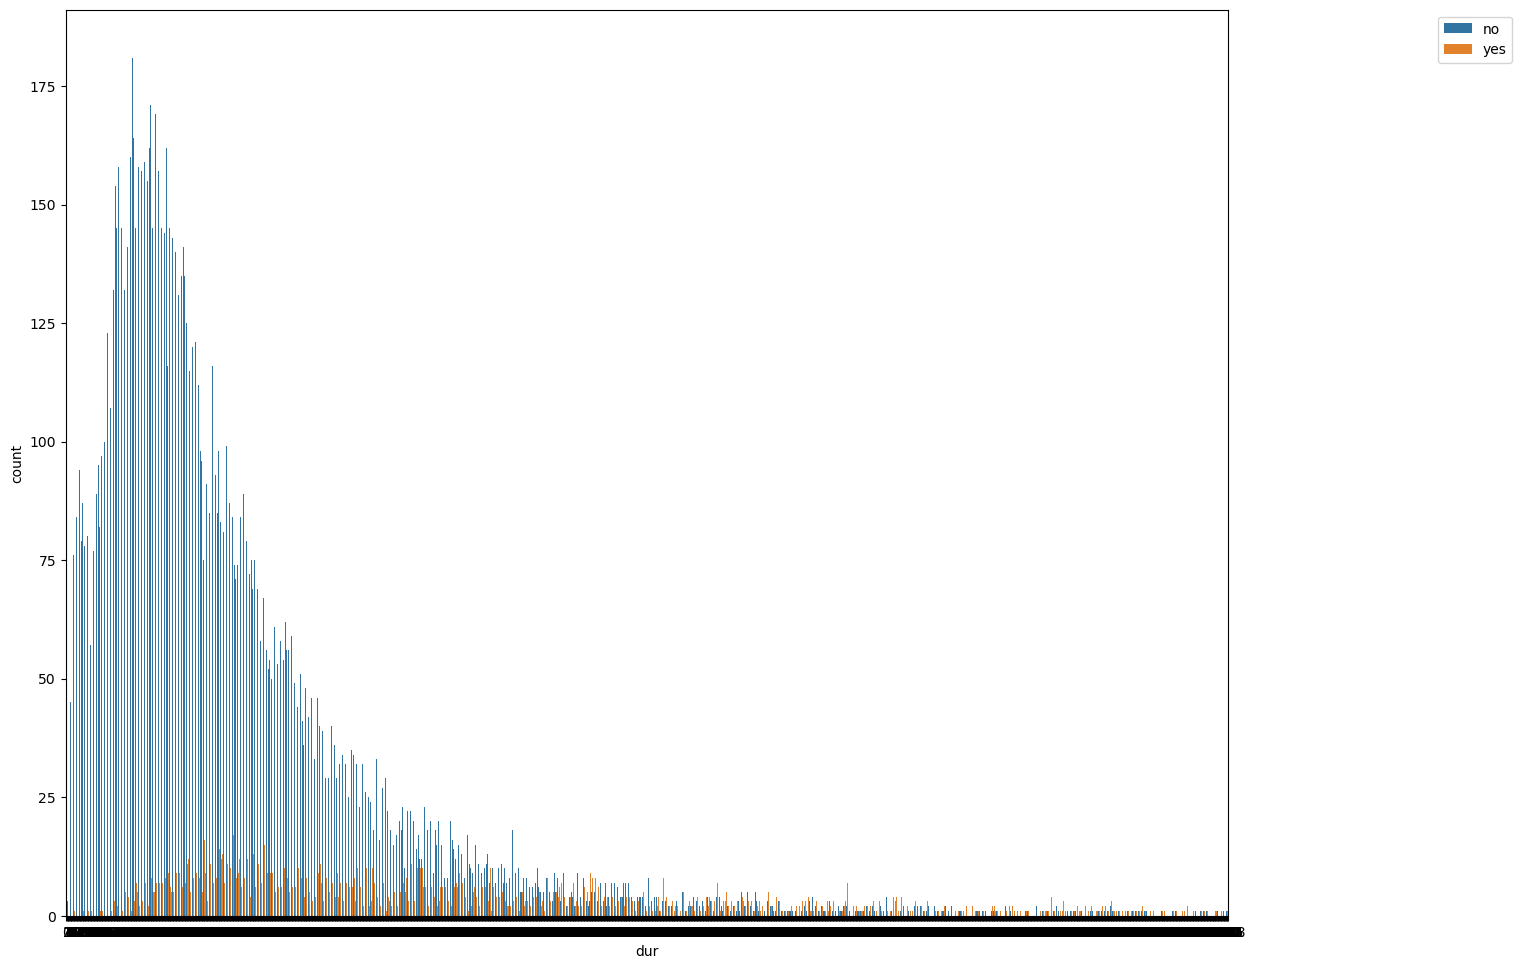

In [48]:
plt.figure(figsize=(15,12),dpi=100)
sns.countplot(x='dur',data=df,hue='y')
plt.legend(bbox_to_anchor=(1.25,1))

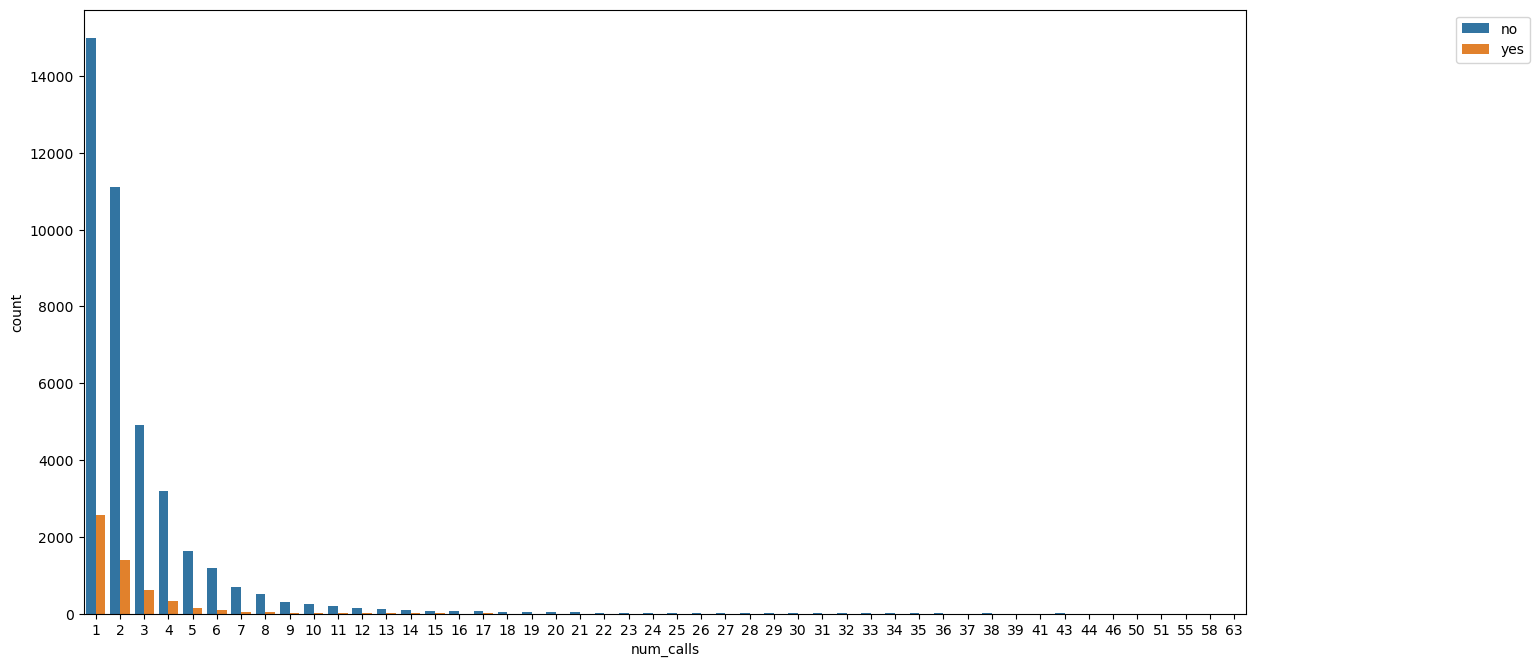

In [50]:
plt.figure(figsize=(15,8),dpi=100)
sns.countplot(x='num_calls',data=df,hue='y')
plt.legend(bbox_to_anchor=(1.25,1))

<Figure size 700x700 with 0 Axes>

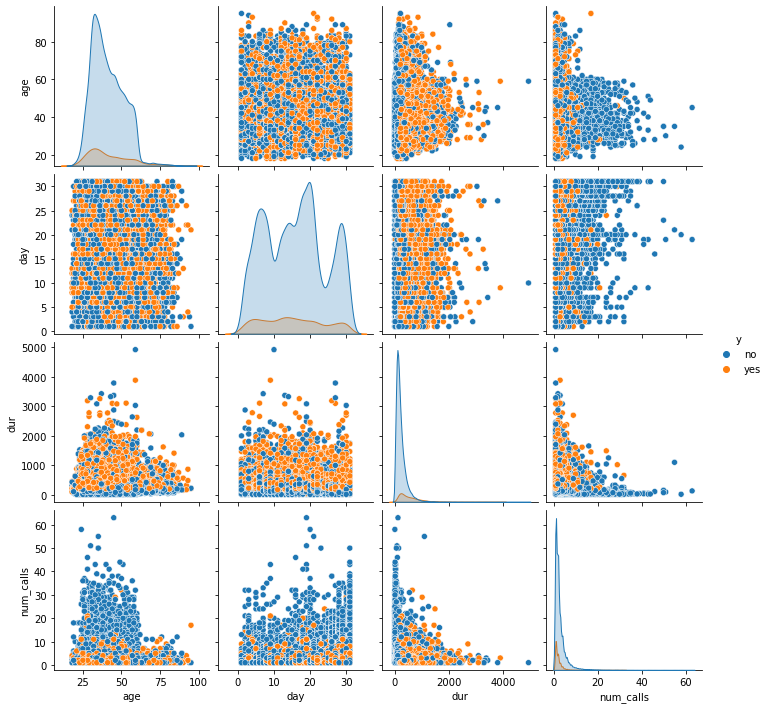

In [51]:
plt.figure(figsize=(7,7),dpi=100)
sns.pairplot(df,hue="y")

<AxesSubplot:>

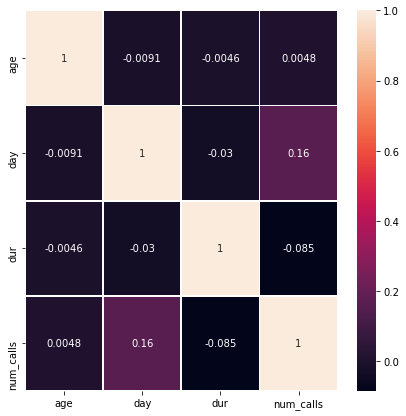

In [52]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.8)

Interpretations : 
From the above data visualization it can be understood that the categorical columns do not have linear realtionship with the target variable ("y" here). 
As we have an Ordinal categorical in the data we use OneHot Encoding to encode all these categorical columns.

## Encoding Categorical Variables

In [53]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,y
0,58,management,married,tertiary,cellular,5,may,261,1,no
1,44,technician,single,secondary,cellular,5,may,151,1,no
2,33,entrepreneur,married,secondary,cellular,5,may,76,1,no
3,47,blue-collar,married,secondary,cellular,5,may,92,1,no
4,33,blue-collar,single,secondary,cellular,5,may,198,1,no


In [54]:
one_hot_encoded_data = pd.get_dummies(df,drop_first=True)
print(one_hot_encoded_data)

       age  day   dur  num_calls  job_blue-collar  job_entrepreneur  \
0       58    5   261          1                0                 0   
1       44    5   151          1                0                 0   
2       33    5    76          1                0                 1   
3       47    5    92          1                1                 0   
4       33    5   198          1                1                 0   
...    ...  ...   ...        ...              ...               ...   
45206   51   17   977          3                0                 0   
45207   71   17   456          2                0                 0   
45208   72   17  1127          5                0                 0   
45209   57   17   508          4                1                 0   
45210   37   17   361          2                0                 1   

       job_housemaid  job_management  job_retired  job_self-employed  ...  \
0                  0               1            0                  0  

In [55]:
one_hot_encoded_data.head()

,age,day,dur,num_calls,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,mon_feb,mon_jan,mon_jul,mon_jun,mon_mar,mon_may,mon_nov,mon_oct,mon_sep,y_yes
0,58,5,261,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,44,5,151,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,33,5,76,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,47,5,92,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,33,5,198,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


<AxesSubplot:>

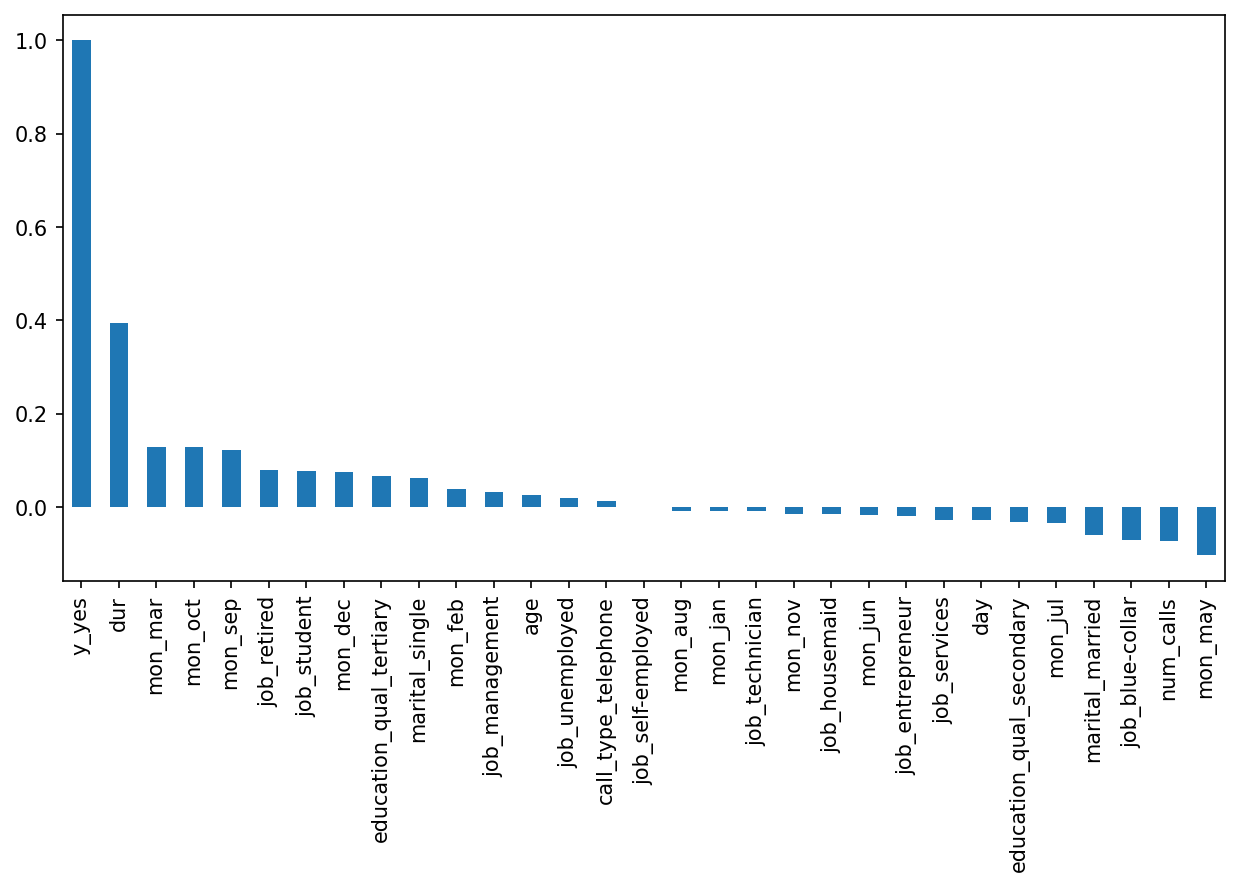

In [56]:
plt.figure(figsize=(10,5),dpi=150)
one_hot_encoded_data.corr()['y_yes'].sort_values(ascending = False).plot(kind = 'bar')

## Splitting the data into input data and output data

In [57]:
#creating a function which will take the whole dataframe as input and return 2 dataframes,                                                        
# one containing input variables and the other holding the target variable

In [61]:
x = one_hot_encoded_data.drop(['y_yes'],axis = 1)
y = one_hot_encoded_data['y_yes']

# Treating the imbalanced data

In [62]:
import imblearn
from imblearn.over_sampling import SMOTE

In [63]:
x_sm, y_sm = SMOTE().fit_resample(x,y)

In [64]:
y_sm.value_counts()

0    39922
1    39922
Name: y_yes, dtype: int64

# Splitting the data into training and testing sets

In [65]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sm,y_sm,test_size=0.2,random_state=101)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(63875, 30) (15969, 30) (63875,) (15969,)


## Standardising the data

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

print(scaled_x_train,scaled_x_test)

[[-0.68193921 -1.49044485  5.24166498 ... -0.24131707 -0.11233475
  -0.09522493]
 [ 0.08635952 -1.49044485  0.19015339 ... -0.24131707 -0.11233475
  -0.09522493]
 [-0.68193921  0.69094245 -0.72156895 ... -0.24131707 -0.11233475
  -0.09522493]
 ...
 [ 0.76929172  1.29688337 -0.9637452  ... -0.24131707 -0.11233475
  -0.09522493]
 [-0.42583964 -0.3997512  -0.205876   ... -0.24131707 -0.11233475
  -0.09522493]
 [-0.34047311  0.44856609  1.57198256 ... -0.24131707 -0.11233475
  -0.09522493]] [[ 9.92991441e-04 -2.78563017e-01 -5.53470146e-01 ... -2.41317073e-01
  -1.12334753e-01 -9.52249297e-02]
 [ 4.27825618e-01  9.33318820e-01  5.97579309e-01 ... -2.41317073e-01
  -1.12334753e-01 -9.52249297e-02]
 [-1.27950489e+00 -3.61866493e-02 -9.83689125e-01 ... -2.41317073e-01
  -1.12334753e-01 -9.52249297e-02]
 ...
 [ 2.57092567e-01  9.33318820e-01  1.63181434e+00 ... -2.41317073e-01
  -1.12334753e-01 -9.52249297e-02]
 [-1.53560446e+00  1.17569519e+00 -5.81961469e-01 ... -2.41317073e-01
  -1.12334753

In [67]:
print(scaled_x_train.shape,scaled_x_test.shape)

(63875, 30) (15969, 30)


## Building Machine Learning Model

In [68]:
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay

# 1.Logistic Regression 

In [69]:
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

#searching optimal parameters , specifically the C value
#print("optimal parameters",log_model.C_)


# models coefficients
log_model.coef_


/Users/haritha/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[ 2.08188117e-02, -1.84043864e-03,  5.92732844e-03,
        -3.30357982e-01, -3.32841625e+00, -1.23878153e+00,
        -1.31235936e+00, -1.43627076e+00, -1.22787025e+00,
        -1.15135532e+00, -1.93457547e+00,  3.45987270e-01,
        -2.15727072e+00, -1.03999798e+00, -9.97091162e-01,
        -5.07163663e-01, -1.01083041e+00, -1.39225806e+00,
        -1.09682300e+00, -2.52055550e+00,  2.19156392e-03,
        -1.40213083e+00, -1.53402607e+00, -3.66692907e+00,
        -2.91903999e+00,  2.98925152e-01, -3.90209237e+00,
        -2.78402012e+00,  8.00521696e-02,  6.30531571e-02]])

###### Model Performance Evaluation

In [70]:
y_pred = log_model.predict(x_test)
lr = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

lr_Accuracy = accuracy_score(y_test,y_pred)
lr_precision = precision_score(y_test,y_pred)
lr_recall = recall_score(y_test,y_pred)
lr_f1 = f1_score(y_test,y_pred)

print('The Accuracy Score for Decision Tree regression:',lr_Accuracy)
print('Precision Score for Decision Tree  Regression is:',lr_precision)
print('recall scorefor Decision Tree  regression is:',lr_recall)
print('F1 Score for Decision Tree  regression is:',lr_f1)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      7931
           1       0.90      0.90      0.90      8038

    accuracy                           0.90     15969
   macro avg       0.90      0.90      0.90     15969
weighted avg       0.90      0.90      0.90     15969

The Accuracy Score for Decision Tree regression: 0.9009956791283111
Precision Score for Decision Tree  Regression is: 0.9037138927097662
recall scorefor Decision Tree  regression is: 0.8991042547897486
F1 Score for Decision Tree  regression is: 0.9014031805425631


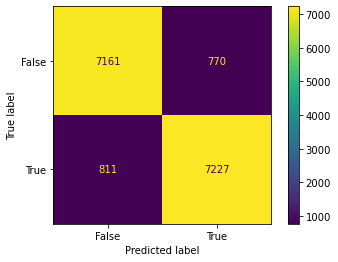

In [71]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = lr,display_labels = [False, True])
cm_display.plot()

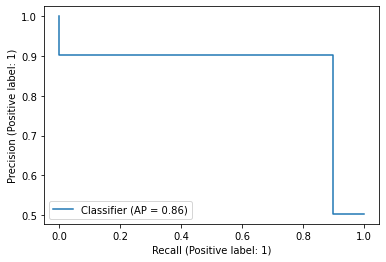

In [72]:
PrecisionRecallDisplay.from_predictions(y_test,y_pred)
plt.show()

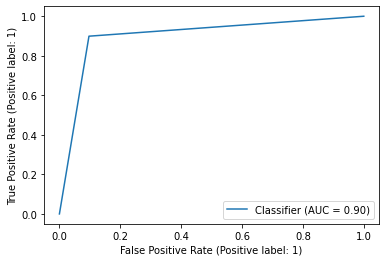

In [73]:
RocCurveDisplay.from_predictions( y_test, y_pred)

In [74]:
rocauclog = (roc_auc_score(y_test,y_pred))
print(rocauclog)

0.901008438074486


In [75]:
from sklearn.metrics import roc_curve, roc_auc_score
y_score1 = log_model.predict_proba(x_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('AUROC_score : ', roc_auc_score(y_test, y_score1))

AUROC_score :  0.9593811723151243


# Decision Tree

In [76]:
dt_model = DecisionTreeClassifier()
dt_model.fit(scaled_x_train,y_train)
base_pred = dt_model.predict(scaled_x_test)
base_pred

array([1, 1, 0, ..., 1, 1, 1], dtype=uint8)

In [77]:
#model evaluatipn
drc = confusion_matrix(y_test,base_pred)
print(classification_report(y_test,base_pred))


dt_Accuracy = accuracy_score(y_test,base_pred)
dt_precision = precision_score(y_test,base_pred)
dt_recall = recall_score(y_test,base_pred)
dt_f1 = f1_score(y_test,base_pred)

print('The Accuracy Score for Decision Tree regression:',dt_Accuracy)
print('Precision Score for Decision Tree  Regression is:',dt_precision)
print('recall scorefor Decision Tree  regression is:',dt_recall)
print('F1 Score for Decision Tree  regression is:',dt_f1)

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      7931
           1       0.90      0.93      0.91      8038

    accuracy                           0.91     15969
   macro avg       0.91      0.91      0.91     15969
weighted avg       0.91      0.91      0.91     15969

The Accuracy Score for Decision Tree regression: 0.9129563529338093
Precision Score for Decision Tree  Regression is: 0.9026162790697675
recall scorefor Decision Tree  regression is: 0.9270962926101021
F1 Score for Decision Tree  regression is: 0.9146925248557752


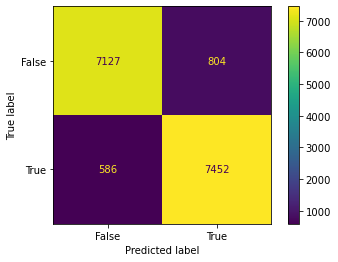

In [78]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = drc,display_labels = [False, True])
cm_display.plot()

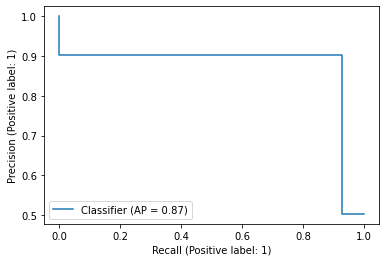

In [79]:
PrecisionRecallDisplay.from_predictions(y_test,base_pred)
plt.show()

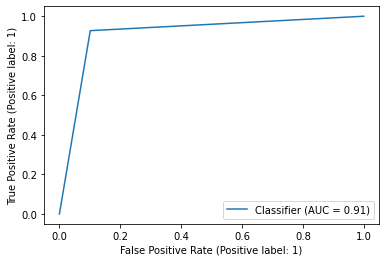

In [80]:
RocCurveDisplay.from_predictions( y_test,base_pred)

In [81]:
rocaucdt = (roc_auc_score(y_test,base_pred))
print(rocaucdt)

0.912860969404282


# Random Forest

In [82]:
rmodel = RandomForestClassifier()
rmodel.fit(scaled_x_train,y_train)

RandomForestClassifier()

In [83]:
rpreds = rmodel.predict(scaled_x_test)

In [84]:
#model evaluatipn
rf = confusion_matrix(y_test,rpreds)
print(classification_report(y_test,rpreds))


raccuracy = accuracy_score(y_test,rpreds)
rprecision = precision_score(y_test,rpreds)
rrecall = recall_score(y_test,rpreds)
rf1 = f1_score(y_test,rpreds)

print('The Accuracy Score for Randoem Froest is:',raccuracy)
print('Precision Score for Randoem Froest is:',rprecision)
print('recall scorefor Randoem Froest is:',rrecall)
print('F1 Score for Randoem Froest is:',rf1)

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      7931
           1       0.94      0.93      0.94      8038

    accuracy                           0.94     15969
   macro avg       0.94      0.94      0.94     15969
weighted avg       0.94      0.94      0.94     15969

The Accuracy Score for Randoem Froest is: 0.9387563404095435
Precision Score for Randoem Froest is: 0.9436902966314731
recall scorefor Randoem Froest is: 0.9340631998009455
F1 Score for Randoem Froest is: 0.9388520695260724


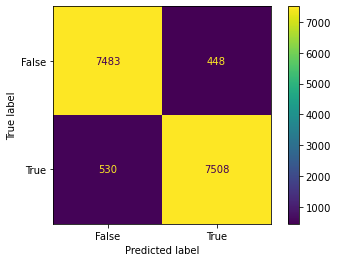

In [85]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = rf,display_labels = [False, True])
cm_display.plot()

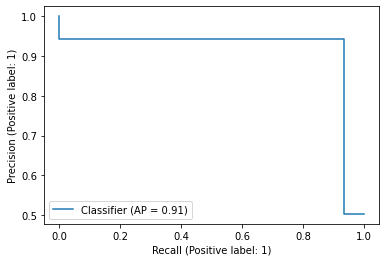

In [86]:
PrecisionRecallDisplay.from_predictions(y_test,rpreds)
plt.show()

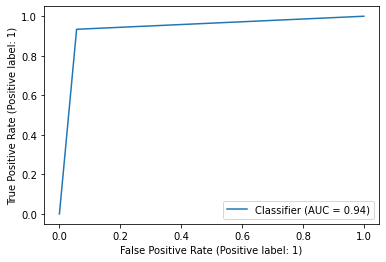

In [87]:
RocCurveDisplay.from_predictions( y_test,rpreds)

In [88]:
rocaucr = (roc_auc_score(y_test,rpreds))
print(rocaucr)

0.9387879988413378


# K-Nearest Neighbour Model


In [89]:
knn = KNeighborsClassifier()

knn.fit(scaled_x_train,y_train)

pred_knn = knn.predict(scaled_x_test)


In [90]:
#model evaluation
kn_nm = confusion_matrix(y_test,pred_knn)
print(classification_report(y_test,pred_knn))


kaccuracy = accuracy_score(y_test,pred_knn)
kprecision = precision_score(y_test,pred_knn)
krecall = recall_score(y_test,pred_knn)
kf1 = f1_score(y_test,pred_knn)

print('The Accuracy Score for KNN is:',raccuracy)
print('Precision Score for KNN is:',rprecision)
print('recall scorefor KNN is:',rrecall)
print('F1 Score for KNN is:',rf1)

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      7931
           1       0.93      0.91      0.92      8038

    accuracy                           0.92     15969
   macro avg       0.92      0.92      0.92     15969
weighted avg       0.92      0.92      0.92     15969

The Accuracy Score for KNN is: 0.9387563404095435
Precision Score for KNN is: 0.9436902966314731
recall scorefor KNN is: 0.9340631998009455
F1 Score for KNN is: 0.9388520695260724


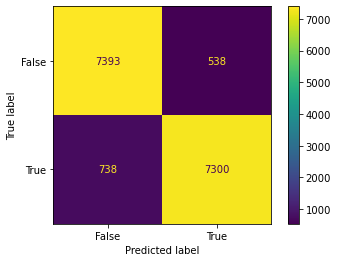

In [91]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = kn_nm,display_labels = [False, True])
cm_display.plot()

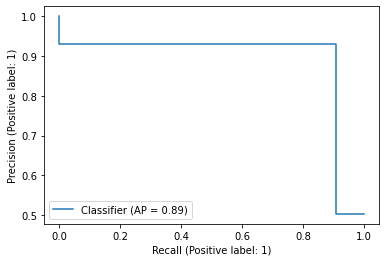

In [92]:
PrecisionRecallDisplay.from_predictions(y_test,pred_knn)
plt.show()

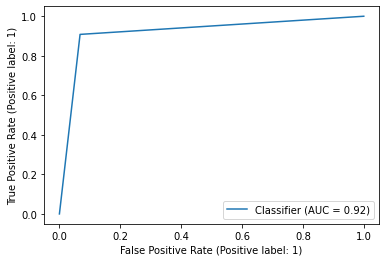

In [93]:
RocCurveDisplay.from_predictions( y_test,pred_knn)

In [94]:
rocaucknn = (roc_auc_score(y_test,pred_knn))
print(rocaucknn)

0.9201755192027128


# GradientBoostingClassifier

In [95]:
gb_model = GradientBoostingClassifier()
gb_model.fit(scaled_x_train,y_train)
gbpredictions = gb_model.predict(scaled_x_test)

In [96]:
#model evaluation
kn_nm = confusion_matrix(y_test,gbpredictions)
print(classification_report(y_test,gbpredictions))


gaccuracy = accuracy_score(y_test,gbpredictions)
gprecision = precision_score(y_test,gbpredictions)
grecall = recall_score(y_test,gbpredictions)
gf1 = f1_score(y_test,gbpredictions)

print('The Accuracy Score for GradientBoosting is:',gaccuracy)
print('Precision Score for GradientBoosting is:',gprecision)
print('recall scorefor GradientBoosting is:',grecall)
print('F1 Score for GradientBoosting is:',gf1)

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      7931
           1       0.91      0.92      0.92      8038

    accuracy                           0.92     15969
   macro avg       0.92      0.92      0.92     15969
weighted avg       0.92      0.92      0.92     15969

The Accuracy Score for GradientBoosting is: 0.9160874193750391
Precision Score for GradientBoosting is: 0.9133547272278449
recall scorefor GradientBoosting is: 0.9206270216471759
F1 Score for GradientBoosting is: 0.9169764560099133


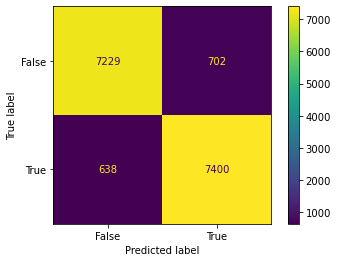

In [97]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = kn_nm,display_labels = [False, True])
cm_display.plot()

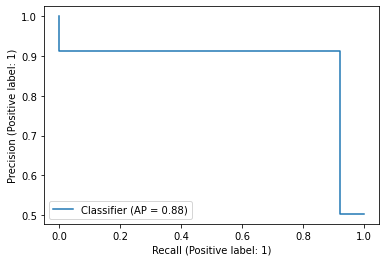

In [98]:
PrecisionRecallDisplay.from_predictions(y_test,gbpredictions)
plt.show()

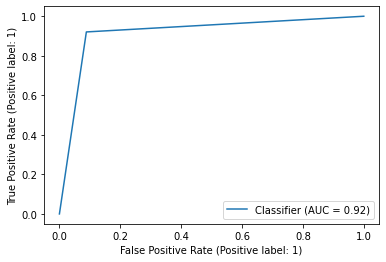

In [99]:
RocCurveDisplay.from_predictions( y_test,gbpredictions)

In [100]:
rocaucgb = (roc_auc_score(y_test,gbpredictions))
print(rocaucgb)

0.9160567966639611


### R2 Score for Machine-Learning Models

In [101]:
y_pred_lr=log_model.predict(scaled_x_test)
y_pred_knn=knn.predict(scaled_x_test)
y_pred_dt= dt_model.predict(scaled_x_test)
y_pred_rf=rmodel.predict(scaled_x_test)
y_pred_gb=gb_model.predict(scaled_x_test)

/Users/haritha/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [102]:
from sklearn.metrics import r2_score

In [103]:
R2_score_lr=r2_score(y_test,y_pred_lr)
R2_score_knn=r2_score(y_test,y_pred_knn)
R2_score_dt=r2_score(y_test,y_pred_dt)
R2_score_rf=r2_score(y_test,y_pred_rf)
R2_score_gb=r2_score(y_test,y_pred_gb)

In [104]:
print("R2 Score for Logistic Model:",R2_score_lr)
print("R2 Score for K-Nearest Neighbors Model:",R2_score_knn)
print("R2 Score for Decision Tree Model: ",R2_score_dt)
print("R2 Score for Random Forest Model: ",R2_score_rf)
print("R2 Score for Extreme-Gradient Boosting Model: ",R2_score_gb)

R2 Score for Logistic Model: 0.4589274267115201
R2 Score for K-Nearest Neighbors Model: 0.6803663872610646
R2 Score for Decision Tree Model:  0.6518097792263948
R2 Score for Random Forest Model:  0.7550143626499383
R2 Score for Extreme-Gradient Boosting Model:  0.6643346073117764


In [105]:
final_data = pd.DataFrame({
    'Models':['LR','KNN','DT','RF','GBC'],
    'Accuracy':[lr_Accuracy,kaccuracy,dt_Accuracy,raccuracy,gaccuracy],
    "Precision":[lr_precision,kprecision,dt_precision,rprecision,gprecision],
    "Recall":[lr_recall,krecall,dt_recall,rrecall,grecall],
    "F1":[lr_f1,kf1,dt_f1,rf1,gf1],
    "ROC_Auc":[rocauclog,rocaucknn,rocaucdt,rocaucr,rocaucgb]
})

In [106]:
final_data

,Models,Accuracy,Precision,Recall,F1,ROC_Auc
0,LR,0.900996,0.903714,0.899104,0.901403,0.901008
1,KNN,0.920095,0.931360,0.908186,0.919627,0.920176
2,DT,0.912956,0.902616,0.927096,0.914693,0.912861
3,RF,0.938756,0.943690,0.934063,0.938852,0.938788
4,GBC,0.916087,0.913355,0.920627,0.916976,0.916057


Out of the models, Random Forest gives better Au-ROC score of 0.938, hence the model is chosen

# Prediction from user input

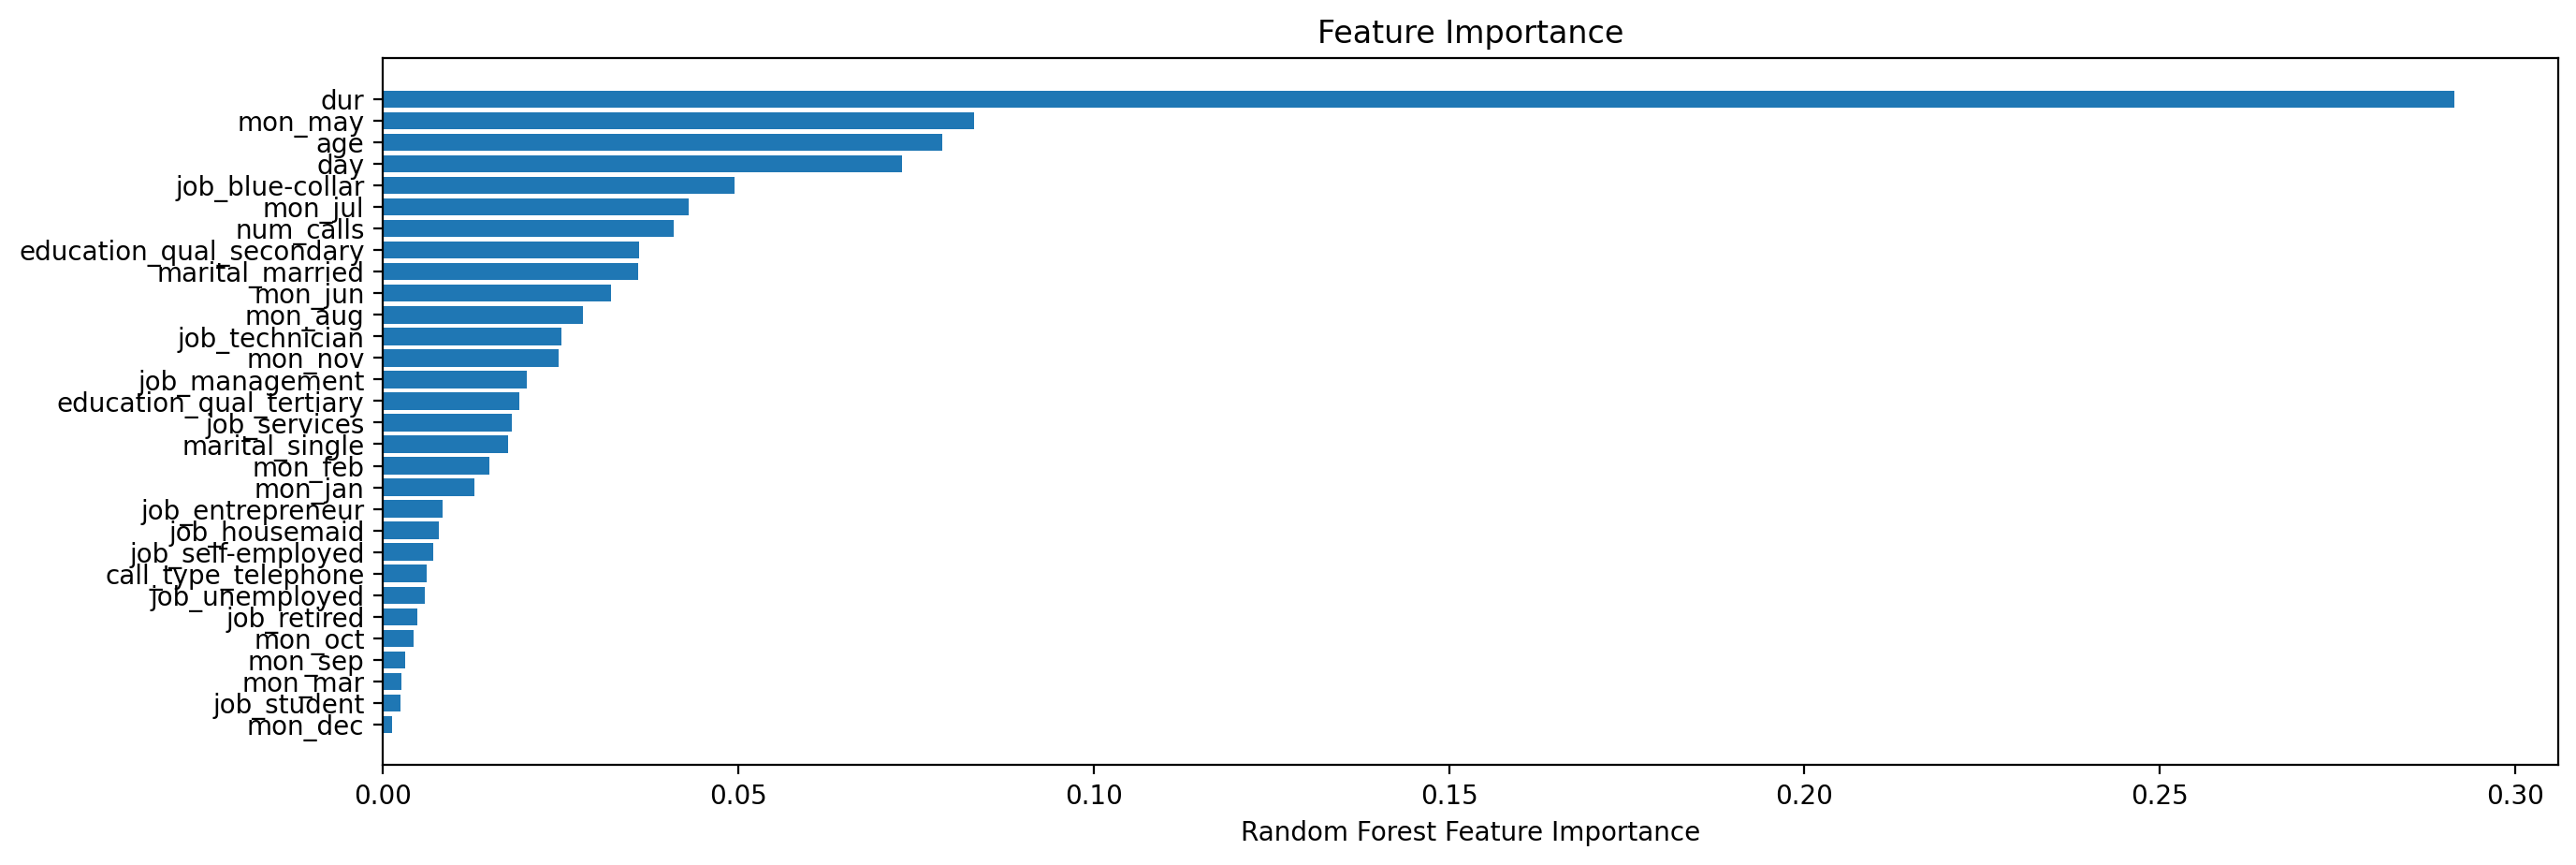

In [109]:
sorted_idx = rmodel.feature_importances_.argsort()
plt.figure(figsize=(15,5),dpi=200)
plt.barh(one_hot_encoded_data.columns[sorted_idx], rmodel.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")
plt.show()

Based on the **feature importance** given by Best Machine Learning,that will predict if a client will subscribe to the insurance.

The clients that should be Focused on the features of order given below to have them subscribe to the insurance.

1. Duration of the call.- longer the call better for influencing the clients.
2. Last contact month of the year - mostly in the financial year.
3. Age of the person
4. Last contact day of the month
5. Job of the person especially people in blue collar jobs are prefereably to sign up for the insurance.
6. No of calls made during the campaign
7. Education status of the person
8. If the person is married or not - maritial status
 

If more information was given on the outcome of the previous marketing campaign((Since majority of the previous outcome is unkown)the model would be able to predict even better results.
